In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('deliveries.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
filt=df['batsman']=='DA Warner'
df_warner=df[filt]
df_warner.shape

(3398, 21)

In [5]:
df_warner['dismissal_kind'].value_counts()

caught               69
bowled               23
run out              10
stumped               5
lbw                   4
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64

<AxesSubplot:ylabel='dismissal_kind'>

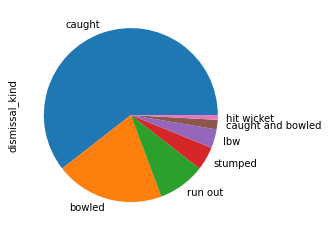

In [6]:
df_warner['dismissal_kind'].value_counts().plot.pie()

In [7]:
filt=df['batsman']=='V Kohli'
df_virat=df[filt]
df_virat.shape

(4211, 21)

In [8]:
df_virat['dismissal_kind'].value_counts()

caught               95
bowled               30
run out              15
lbw                   7
stumped               3
caught and bowled     2
Name: dismissal_kind, dtype: int64

<AxesSubplot:ylabel='dismissal_kind'>

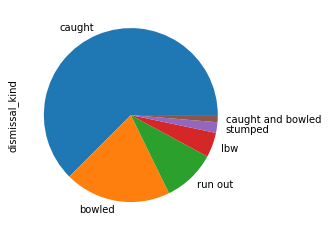

In [9]:
df_virat['dismissal_kind'].value_counts().plot.pie()

In [10]:
len(df_virat[df_virat['batsman_runs']==4])

482

In [11]:
len(df_virat[df_virat['batsman_runs']==6])

191

In [12]:
def count(df,runs):
    return len(df_virat[df_virat['batsman_runs']==runs])*runs

In [13]:
count(df_virat,1)

1741

In [14]:
count(df_virat,2)

586

In [15]:
count(df_virat,3)

33

In [16]:
count(df_virat,4)

1928

In [17]:
count(df_virat,6)

1146

([<matplotlib.patches.Wedge at 0x1cfc414ddc0>,
 [Text(0.5882707007467876, 0.9294824272910618, '1'),
  Text(-0.7744375267319566, 0.7811827681082641, '2'),
  Text(-0.9990040857669241, 0.46042462642759713, '3'),
  Text(-0.8400086839566966, -0.7102009651340518, '4'),
  Text(0.8672727616129872, -0.6766372417803966, '6')],
 [Text(0.32087492768006587, 0.5069904148860336, '32.0%'),
  Text(-0.4224204691265218, 0.4260996916954168, '10.8%'),
  Text(-0.5449113195092312, 0.25114070532414384, '0.6%'),
  Text(-0.45818655488547083, -0.38738234461857374, '35.5%'),
  Text(0.4730578699707202, -0.3690748591529436, '21.1%')])

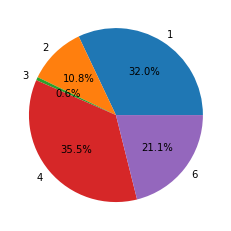

In [18]:
slices=[1741,586,33,1928,1146]
labels=[1,2,3,4,6]
plt.pie(slices,labels=labels,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1cfc4245280>,
 [Text(0.5882707007467876, 0.9294824272910618, '1'),
  Text(-0.7744375267319566, 0.7811827681082641, '2'),
  Text(-0.9990040857669241, 0.46042462642759713, '3'),
  Text(-0.9163731097709418, -0.7747646892371475, '4'),
  Text(0.8672727616129872, -0.6766372417803966, '6')],
 [Text(0.32087492768006587, 0.5069904148860336, '32.0%'),
  Text(-0.4224204691265218, 0.4260996916954168, '10.8%'),
  Text(-0.5449113195092312, 0.25114070532414384, '0.6%'),
  Text(-0.534550980699716, -0.45194606872166937, '35.5%'),
  Text(0.4730578699707202, -0.3690748591529436, '21.1%')])

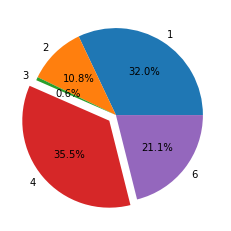

In [19]:
slices=[1741,586,33,1928,1146]
labels=[1,2,3,4,6]
explode=[0,0,0,0.1,0]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)

In [20]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [21]:
Teams={
    'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS', 'Delhi Capitals':'DC'
}

In [22]:
df['bowling_team']=df['bowling_team'].map(Teams)
df['batting_team']=df['batting_team'].map(Teams)

In [23]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [24]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [25]:
df.groupby(['match_id','inning','batting_team'])['total_runs'].sum()

match_id  inning  batting_team
1         1       SRH             207
          2       RCB             172
2         1       MI              184
          2       RPS             187
3         1       GL              183
                                 ... 
11413     2       DC              170
11414     1       DC              155
          2       CSK             162
11415     1       MI              152
          2       CSK             157
Name: total_runs, Length: 1528, dtype: int64

In [26]:
df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()

,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183
...,...,...,...,...
1523,11413,2,DC,170
1524,11414,1,DC,155
1525,11414,2,CSK,162
1526,11415,1,MI,152


In [27]:
runs=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)
runs

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183
...,...,...,...
1523,2,DC,170
1524,1,DC,155
1525,2,CSK,162
1526,1,MI,152


In [28]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

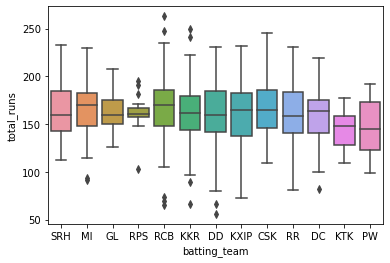

In [29]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

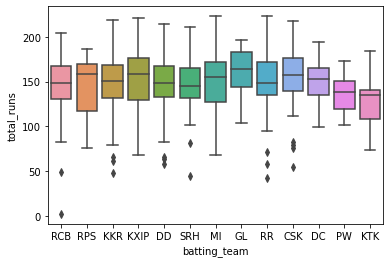

In [30]:
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

In [31]:
df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1523,11413,2,DC,SRH,170
1524,11414,1,DC,CSK,155
1525,11414,2,CSK,DC,162
1526,11415,1,MI,CSK,152


In [32]:
high_score=df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_score

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1523,11413,2,DC,SRH,170
1524,11414,1,DC,CSK,155
1525,11414,2,CSK,DC,162
1526,11415,1,MI,CSK,152


In [33]:
score_200=high_score[high_score['total_runs']>=200]
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1475,11326,2,KKR,RCB,219
1488,11333,1,RCB,KXIP,213
1498,11338,1,KKR,MI,241
1499,11338,2,MI,KKR,204


C:\Users\arbab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batting_team', ylabel='count'>

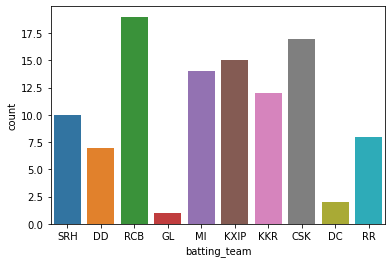

In [34]:
sns.countplot(score_200['batting_team'])

C:\Users\arbab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bowling_team', ylabel='count'>

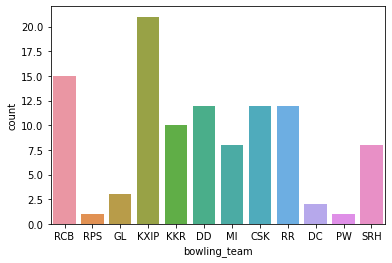

In [35]:
sns.countplot(score_200['bowling_team'])

In [36]:
# Balls played by each batsman
df.groupby('batsman')['ball'].count().reset_index()

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
...,...,...
511,YV Takawale,183
512,Yashpal Singh,67
513,Younis Khan,7
514,Yuvraj Singh,2207


In [37]:
balls_played=df.groupby('batsman')['ball'].count().reset_index()
balls_played

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
...,...,...
511,YV Takawale,183
512,Yashpal Singh,67
513,Younis Khan,7
514,Yuvraj Singh,2207


In [38]:
runs_scored=df.groupby('batsman')['batsman_runs'].sum().reset_index()
runs_scored

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
511,YV Takawale,192
512,Yashpal Singh,47
513,Younis Khan,3
514,Yuvraj Singh,2765


In [39]:
four=df[df['batsman_runs']==4]
four

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,SRH,RCB,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,SRH,RCB,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,SRH,RCB,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179028,11415,2,CSK,MI,12,6,SR Watson,MS Dhoni,RD Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179050,11415,2,CSK,MI,16,3,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179051,11415,2,CSK,MI,16,4,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179052,11415,2,CSK,MI,16,5,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [40]:
sixes=df[df['batsman_runs']==6]
sixes

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,SRH,RCB,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,SRH,RCB,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,SRH,RCB,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,SRH,RCB,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,SRH,RCB,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178987,11415,2,CSK,MI,6,4,SR Watson,SK Raina,SL Malinga,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179048,11415,2,CSK,MI,16,1,DJ Bravo,SR Watson,SL Malinga,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179061,11415,2,CSK,MI,18,2,SR Watson,DJ Bravo,KH Pandya,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179062,11415,2,CSK,MI,18,3,SR Watson,DJ Bravo,KH Pandya,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [41]:
four_runs=four.groupby('batsman')['batsman_runs'].count().reset_index()
four_runs

,batsman,batsman_runs
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Hales,13
...,...,...
405,YK Pathan,264
406,YV Takawale,26
407,Yashpal Singh,5
408,Yuvraj Singh,218


In [42]:
four_runs=four.groupby('batsman')['batsman_runs'].count().reset_index()
four_runs.columns=['batsman','4s']
four_runs

,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Hales,13
...,...,...
405,YK Pathan,264
406,YV Takawale,26
407,Yashpal Singh,5
408,Yuvraj Singh,218


In [43]:
six_runs=sixes.groupby('batsman')['batsman_runs'].count().reset_index()
six_runs.columns=['batsman','6s']
six_runs

,batsman,6s
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Hales,6
4,A Mishra,5
...,...,...
331,Y Venugopal Rao,37
332,YK Pathan,161
333,YV Takawale,3
334,Yuvraj Singh,149


In [44]:
player=pd.concat([runs,balls_played.iloc[:,1],four_runs.iloc[:,1],six_runs.iloc[:,1]],axis=1)
player

,inning,batting_team,total_runs,ball,4s,6s
0,1,SRH,207,196.0,16.0,15.0
1,2,RCB,172,7.0,7.0,1.0
2,1,MI,184,75.0,1.0,2.0
3,2,RPS,187,20.0,5.0,6.0
4,1,GL,183,5.0,13.0,5.0
...,...,...,...,...,...,...
1523,2,DC,170,NaN,NaN,NaN
1524,1,DC,155,NaN,NaN,NaN
1525,2,CSK,162,NaN,NaN,NaN
1526,1,MI,152,NaN,NaN,NaN


In [45]:
player.fillna(0,inplace=True)

In [46]:
player

,inning,batting_team,total_runs,ball,4s,6s
0,1,SRH,207,196.0,16.0,15.0
1,2,RCB,172,7.0,7.0,1.0
2,1,MI,184,75.0,1.0,2.0
3,2,RPS,187,20.0,5.0,6.0
4,1,GL,183,5.0,13.0,5.0
...,...,...,...,...,...,...
1523,2,DC,170,0.0,0.0,0.0
1524,1,DC,155,0.0,0.0,0.0
1525,2,CSK,162,0.0,0.0,0.0
1526,1,MI,152,0.0,0.0,0.0


In [51]:
balls=df.groupby('batsman')['ball'].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
...,...,...
511,YV Takawale,183
512,Yashpal Singh,67
513,Younis Khan,7
514,Yuvraj Singh,2207


In [52]:
runs=df.groupby('batsman')['batsman_runs'].sum().reset_index()
runs

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
511,YV Takawale,192
512,Yashpal Singh,47
513,Younis Khan,3
514,Yuvraj Singh,2765


In [53]:
player=pd.concat([runs,balls.iloc[:,1],four_runs.iloc[:,1],six_runs.iloc[:,1]],axis=1)
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,6.0
4,A Dananjaya,4,5,13.0,5.0
...,...,...,...,...,...
511,YV Takawale,192,183,NaN,NaN
512,Yashpal Singh,47,67,NaN,NaN
513,Younis Khan,3,7,NaN,NaN
514,Yuvraj Singh,2765,2207,NaN,NaN


In [54]:
player.fillna(0,inplace=True)

In [55]:
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,6.0
4,A Dananjaya,4,5,13.0,5.0
...,...,...,...,...,...
511,YV Takawale,192,183,0.0,0.0
512,Yashpal Singh,47,67,0.0,0.0
513,Younis Khan,3,7,0.0,0.0
514,Yuvraj Singh,2765,2207,0.0,0.0


In [59]:
player['strike_rate']=(player['batsman_runs']/player['ball'])*100

In [60]:
player

,batsman,batsman_runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,7.0,1.0,57.142857
2,A Chopra,53,75,1.0,2.0,70.666667
3,A Choudhary,25,20,5.0,6.0,125.000000
4,A Dananjaya,4,5,13.0,5.0,80.000000
...,...,...,...,...,...,...
511,YV Takawale,192,183,0.0,0.0,104.918033
512,Yashpal Singh,47,67,0.0,0.0,70.149254
513,Younis Khan,3,7,0.0,0.0,42.857143
514,Yuvraj Singh,2765,2207,0.0,0.0,125.283190


In [61]:
group=df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
group

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6
1,1,BCJ Cutting,SRH,16
2,1,CH Gayle,RCB,32
3,1,DA Warner,SRH,14
4,1,DJ Hooda,SRH,16
...,...,...,...,...
11289,11415,RD Chahar,MI,0
11290,11415,RG Sharma,MI,15
11291,11415,SK Raina,CSK,9
11292,11415,SN Thakur,CSK,2


In [62]:
group.groupby('batsman')['batsman_runs'].max()

batsman
A Ashish Reddy    36
A Chandila         4
A Chopra          24
A Choudhary       15
A Dananjaya        4
                  ..
YV Takawale       45
Yashpal Singh     20
Younis Khan        3
Yuvraj Singh      83
Z Khan            23
Name: batsman_runs, Length: 516, dtype: int64

In [63]:
max=group.groupby('batsman')['batsman_runs'].max().reset_index()
max.columns=['batsman','max_runs']
max

,batsman,max_runs
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Dananjaya,4
...,...,...
511,YV Takawale,45
512,Yashpal Singh,20
513,Younis Khan,3
514,Yuvraj Singh,83


In [65]:
player2=pd.concat([player,max.iloc[:,1]],axis=1)
player2

,batsman,batsman_runs,ball,4s,6s,strike_rate,max_runs
0,A Ashish Reddy,280,196,16.0,15.0,142.857143,36
1,A Chandila,4,7,7.0,1.0,57.142857,4
2,A Chopra,53,75,1.0,2.0,70.666667,24
3,A Choudhary,25,20,5.0,6.0,125.000000,15
4,A Dananjaya,4,5,13.0,5.0,80.000000,4
...,...,...,...,...,...,...,...
511,YV Takawale,192,183,0.0,0.0,104.918033,45
512,Yashpal Singh,47,67,0.0,0.0,70.149254,20
513,Younis Khan,3,7,0.0,0.0,42.857143,3
514,Yuvraj Singh,2765,2207,0.0,0.0,125.283190,83


<AxesSubplot:xlabel='batsman'>

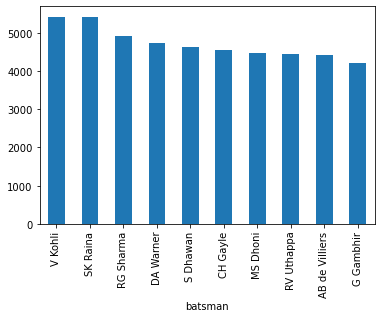

In [70]:
# Top 10 batsman
max_runs=df.groupby('batsman')['batsman_runs'].sum()
max_runs.sort_values(ascending=False)[:10].plot(kind='bar')

In [71]:
df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
10149,7935,RR Pant,DD,130
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
10417,7953,SR Watson,CSK,121


In [72]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [73]:
dismissal_kind=['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']

In [74]:
out=df[df['dismissal_kind'].isin(dismissal_kind)]
out.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


In [75]:
out['bowler'].value_counts()

SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
                  ... 
Swapnil Singh        1
RG More              1
SS Sarkar            1
T Henderson          1
SS Mundhe            1
Name: bowler, Length: 348, dtype: int64

<AxesSubplot:>

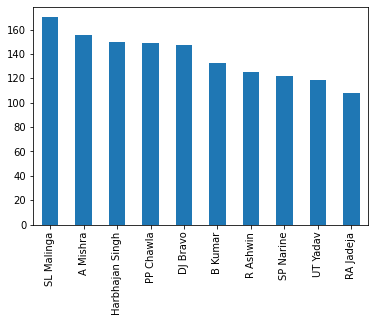

In [76]:
out['bowler'].value_counts()[:10].plot(kind='bar')